<a href="https://colab.research.google.com/github/noircir/TensorFlow-Examples/blob/master/Create_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
class Neural_Network:
    def __init__(self):
        # Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
        
    def forward(self, X=None):
        # Propagate inputs through networks
        self.z2 = X.dot(self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

In [4]:
# The first layer
# What is the score on your test based on how many hours you slept
# and how many hours you study the night before

X = np.array([[3,5],[5,1],[10,2]])
X

array([[ 3,  5],
       [ 5,  1],
       [10,  2]])

In [0]:
NN = Neural_Network()

In [6]:
# the ground truth is [75, 82, 93]
# the results are terrible because the network is not trained yet 
# (the weight are random numbers)

yHat = NN.forward(X)  
yHat

array([[0.60484744],
       [0.77401846],
       [0.7922305 ]])

In [7]:
# Ground truth
y = np.array([[0.75],[0.82],[0.93]])
y

array([[0.75],
       [0.82],
       [0.93]])

In [8]:
y.shape

(3, 1)

## Curse of Dimensionality

In [0]:
# Let's measure time required to compute 1000 weights to find the best cost,
# just for one weight W[0,0]. 
import time

weightsToTry = np.linspace(-10,10,1000)
costs = np.zeros(1000)
startTime = time.clock()
for i in range(1000):
  # changing only the first weight W1[0,0]
  NN.W1[0,0] = weightsToTry[i]
  yHat = NN.forward(X)
  costs[i] = 0.5 * sum((y-yHat)**2)

endTime = time.clock()

In [10]:
timeElapsed = endTime - startTime
timeElapsed

0.0450839999999999

Text(0.5, 0, 'Weight')

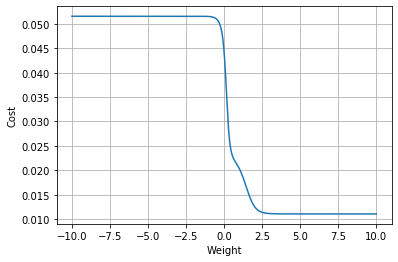

In [11]:
# 0.032 seconds just to run the function with 1000 different values of 1 weight

plt.plot(weightsToTry, costs)
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Weight')

In [0]:
# Now for 2 weights. 
# Computation time increases to 14.8 seconds! 

weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros([1000, 1000])
startTime = time.clock()
for i in range(1000):
  for j in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    NN.W1[0,1] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5 * sum((y-yHat)**2) # an array of 1000 items

endTime = time.clock()

### 25 seconds to try 1000 samples of 2 weights, => 1,000,000 combinations.
### Adding a third weight will require 1 billion combinations. 
### => Exponential increase.

In [13]:
timeElapsed = endTime - startTime
timeElapsed

24.877457999999997

Text(0.5, 0, 'Weight')

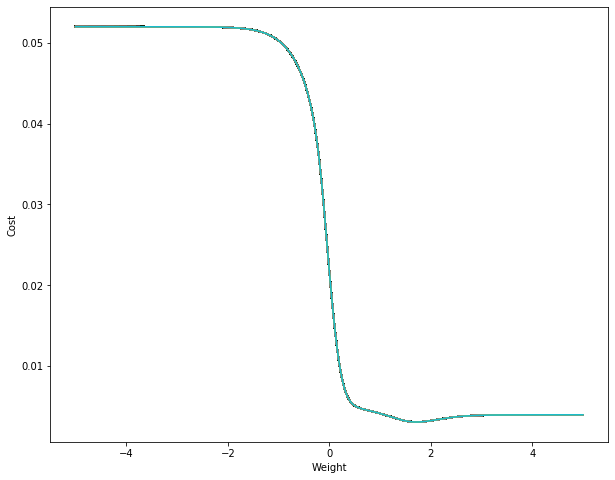

In [14]:
plt.figure(figsize=(10,8))
plt.plot(weightsToTry, costs)
# plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Weight')

In [14]:
# time needed to search through all 9 weights (of this simple neural network), in years:
# (assuming 0.04 seconds per 1000 of 1 weight)
0.04*(1000**(9-1))/(3600*24*365)

# Longer than an universe has been here

1268391679350583.5

## Gradient descent

In [0]:
# We have 5 equations, but we can collapse them into one, for cost:

# We want to know which way is downhill, that is, 
# what is the rate of change for J w.r.t. to W? Also known as a derivative.
# Since we are considering one weight at a time, it is a partial derivative. 

### Depending on how we use our data, it may not matter if our cost function convex or not. (Has one minimum or not)

In [0]:
# If we use our data one example at a time, instead of using them all at once, 
# sometimes it won't matter if the function os convex or not. (Stochastic gradient descent)

# Batch style: when we use all our examples at once: sum(dJ/dWi)

# Our weights are separated into two matrices. We will separate our dJ/dW computation
# in the same way:

In [0]:
# The sizes of matrix derivatives will be the same as the matrices sizes:

In [0]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoidPrime(z):
    # Derivative of sigmoid function
    return np.exp(-z)/((1+np.exp(-z))**2)

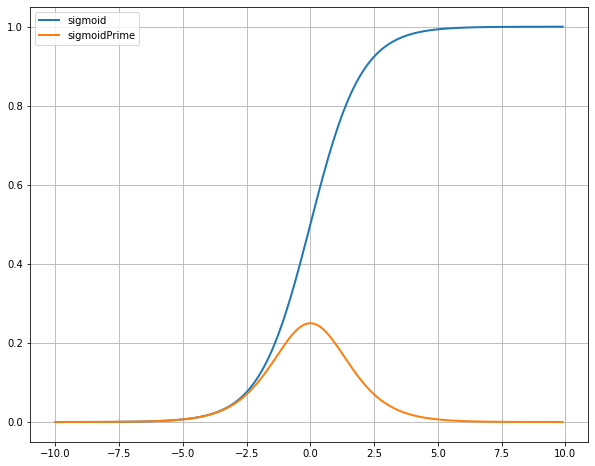

In [19]:
# the derivative should be the largest where the sigmoid function is the steepest

testValues = np.arange(-10,10,0.1)
plt.figure(figsize=(10,8))
plt.plot(testValues, sigmoid(testValues), linewidth=2, label='sigmoid')
plt.plot(testValues, sigmoidPrime(testValues), linewidth=2, label='sigmoidPrime')
plt.grid(1)
plt.legend()

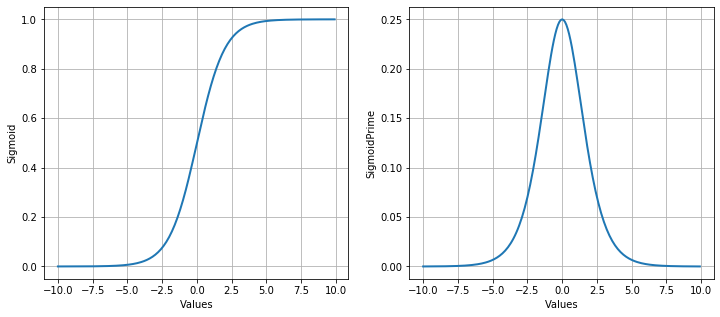

In [20]:
# Or:

Fig = plt.figure(figsize=(12,5))
ax1 = Fig.add_subplot(121)
ax1.plot(testValues, sigmoid(testValues), linewidth=2)
ax1.set_xlabel('Values')
ax1.set_ylabel('Sigmoid')
plt.grid(1)

ax2 = Fig.add_subplot(122)
ax2.plot(testValues, sigmoidPrime(testValues), linewidth=2)
ax2.set_xlabel('Values')
ax2.set_ylabel('SigmoidPrime')
plt.grid(1)